In [16]:
import psycopg2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px

sns.set_palette("deep")

host = "92.63.70.133"
port = "5432"
dbname = "webinar"
user = "student"
password = "6ecf4d61"

def fetch_data_pandas(sql_query):
  try:
      connection = psycopg2.connect(
          host=host,
          port=port,
          dbname=dbname,
          user=user,
          password=password
      )

      #print(connection.get_dsn_parameters(), "\n")

      return pd.read_sql(sql_query, connection)

  except Exception as error:
      print("Error while connecting to PostgreSQL", error)

  finally:
      if (connection):
          connection.close()
          print("PostgreSQL connection is closed")


In [47]:
query = """
select 
	(s.session_start_time::date  - ui.user_start_date) as active_day,
	channel,
	count(*) as qty
from webinar_mobile_game.user_info ui 
join webinar_mobile_game.sessions s on ui.user_id = s.user_id
where 
	1=1
	and s.session_start_time::date >= ui.user_start_date
group by 1,2
"""

df = fetch_data_pandas(query)

PostgreSQL connection is closed


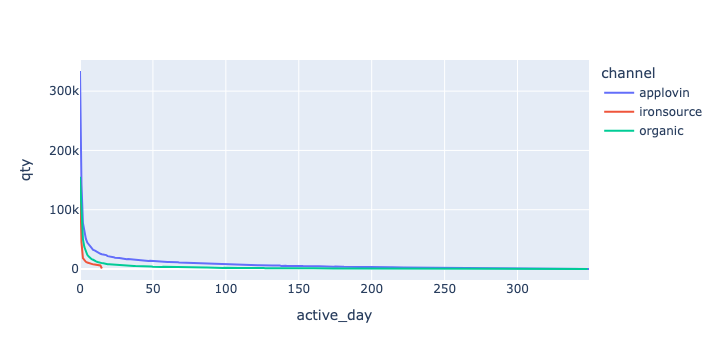

In [48]:
px.line(df, x='active_day', y='qty', line_group='channel', color='channel')
#px.line(df, x='active_day', y='qty')

<Axes: xlabel='event_date', ylabel='revenue'>

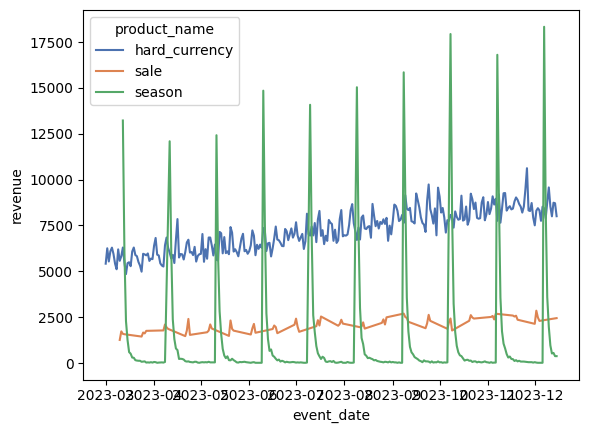

In [25]:
sns.lineplot(x=df.event_date, y=df.revenue, hue=df.product_name)

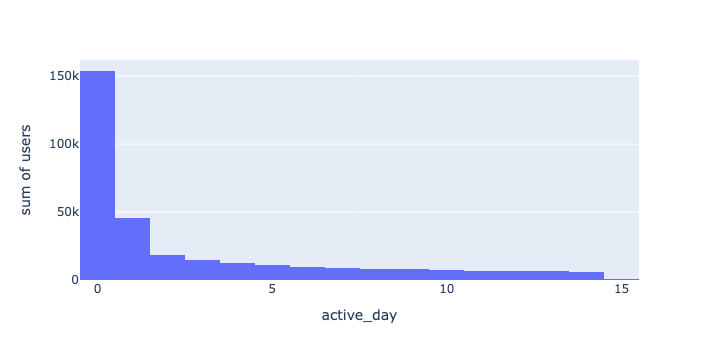

In [43]:
px.histogram(df, x='active_day', y='users', nbins=16)

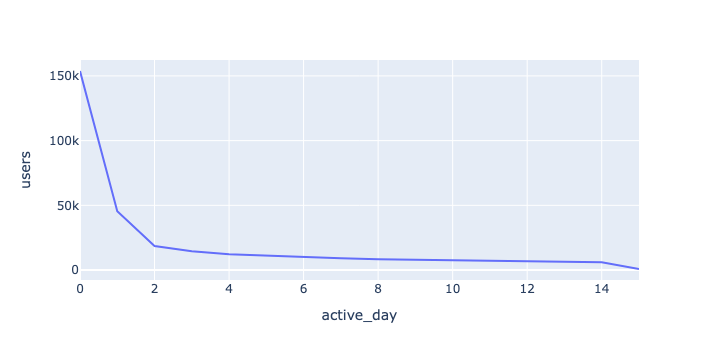

In [44]:
px.line(df, x='active_day', y='users')